## Predictive Analysis for Incidents

In [1]:
# Import necessary libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from datetime import datetime

In [2]:
# Bring IOT Acceleration Data for analysis
IOT_accel=pd.read_csv('Zoomo_IoT_accel_Cleaned.csv')

In [3]:
# Preview Data
IOT_accel.head()

,Unnamed: 0,time,ax (m/s^2),ay (m/s^2),az (m/s^2),aT (m/s^2)
0,0,0.004313,-0.2607,0.0004,0.1696,0.311
1,1,0.016459,0.0307,0.0412,0.1094,0.121
2,2,0.022998,-0.0977,0.0356,0.0876,0.136
3,3,0.033322,0.0960,0.0820,0.0731,0.146
4,4,0.042877,0.0219,0.0941,0.0491,0.108


In [4]:
# Drop Unnecessary columns and rename columns
IOT_accel.drop(['Unnamed: 0', 'ax (m/s^2)','ay (m/s^2)','az (m/s^2)'], axis=1, inplace=True)
IOT_accel.columns = ['time','Amag']

In [5]:
# Preview Data
IOT_accel.head()

,time,Amag
0,0.004313,0.311
1,0.016459,0.121
2,0.022998,0.136
3,0.033322,0.146
4,0.042877,0.108


In [6]:
# Calculate normalised Amag using 'Max-min' method.

IOT_accel['fAmag_norm'] = ((IOT_accel['Amag'] - IOT_accel['Amag'].min())/ (IOT_accel['Amag'].max() - IOT_accel['Amag'].min()))

In [7]:
# Insert new column time delta
IOT_accel.insert(1,'time_seconds_delta','')

In [8]:
# Calculate time delta
IOT_accel['time_seconds_delta'] = IOT_accel['time'].diff()
IOT_accel['time_seconds_delta']=IOT_accel['time_seconds_delta'].fillna(0)

In [9]:
# Preview Data
IOT_accel.head()

,time,time_seconds_delta,Amag,fAmag_norm
0,0.004313,0.000000,0.311,0.003577
1,0.016459,0.012146,0.121,0.001327
2,0.022998,0.006539,0.136,0.001504
3,0.033322,0.010324,0.146,0.001623
4,0.042877,0.009555,0.108,0.001173


In [10]:
# Bring IOT Gyro Data for analysis
IOT_gyro=pd.read_csv('Zoomo_IoT_gyro_Cleaned.csv')

In [11]:
# Gmag is equal to (Gx^2+Gy^2+Gz^2)^.5
# Calculating Gmag using gyro data
IOT_gyro['Gmag'] = (IOT_gyro['wx (rad/s)']**2 + IOT_gyro['wy (rad/s)']**2 + IOT_gyro['wz (rad/s)']**2)**0.5

In [12]:
# Calculate normalised Gmag using 'Max-min' method.

IOT_gyro['Gmag_norm'] = ((IOT_gyro['Gmag'] - IOT_gyro['Gmag'].min())/ 
                                     (IOT_gyro['Gmag'].max() - IOT_gyro['Gmag'].min()))

In [13]:
# Drop Unnecessary columns and rename columns

IOT_gyro.drop(['Unnamed: 0', 'wx (rad/s)','wy (rad/s)','wz (rad/s)'], axis=1, inplace=True)
IOT_gyro.columns = ['time','Gmag', 'Gmag_norm']

In [14]:
# Insert new column time delta
IOT_gyro.insert(1,'time_seconds_delta','')

In [15]:
# Calculate time delta
IOT_gyro['time_seconds_delta'] = IOT_gyro['time'].diff()
IOT_gyro['time_seconds_delta']=IOT_gyro['time_seconds_delta'].fillna(0)

In [16]:
# Preview Data
IOT_gyro.head()

,time,time_seconds_delta,Gmag,Gmag_norm
0,0.000821,0.000000,0.0,0.0
1,0.000997,0.000176,0.0,0.0
2,0.001085,0.000088,0.0,0.0
3,0.001171,0.000086,0.0,0.0
4,0.002772,0.001601,0.0,0.0


## accel_7_fast_and_stop - BLR Model

In [17]:
# Import CVS files
accel_7_fast_and_stop = pd.read_csv('accel_7_fast_and_stop_normal_vs_abnormal.csv')

In [18]:
accel_7_fast_and_stop.head()

,Unnamed: 0,time_seconds,time_seconds_delta,Timestamp,Data,AX,AY,AZ,fAX,fAY,fAZ,speed_change,filtered_speed_change,Amag,fAmag,fAmag_norm,Q3 threshold,Std threshold,HO threshold
0,0,65541.234,0.000,18:12:21:234,0001462415 [app] INFO: ACCEL:,-704,-480,576,26.766279,168.241196,8.758143,0.000,0.000000,1028.490156,170.582059,0.028189,Normal data,Normal data,Normal data
1,1,65541.325,0.091,18:12:21:325,0001462551 [app] INFO: ACCEL:,-2016,1984,96,-3.032218,195.304382,10.175572,-183.456,-0.275932,2830.146286,195.592787,0.041602,Normal data,Normal data,Normal data
2,2,65541.416,0.091,18:12:21:416,0001462641 [app] INFO: ACCEL:,-1024,-544,1824,-18.302029,184.058868,39.223648,-93.184,-1.665485,2161.362533,189.079681,0.038109,Normal data,Normal data,Normal data
3,3,65541.507,0.091,18:12:21:507,0001462731 [app] INFO: ACCEL:,-960,-288,1600,-32.457813,176.883011,64.703102,-87.360,-2.953661,1888.000000,191.121952,0.039205,Normal data,Normal data,Normal data
4,4,65541.603,0.096,18:12:21:603,0001462821 [app] INFO: ACCEL:,-1216,448,1792,-50.310703,180.980347,93.299789,-116.736,-4.829827,2211.475526,209.737702,0.049189,Normal data,Normal data,Normal data


In [19]:
# Create new column with necessary columns
accel_7_fast_and_stop_copy=accel_7_fast_and_stop[['time_seconds', 'time_seconds_delta', 'fAmag_norm', 'Q3 threshold','Std threshold', 'HO threshold']]

In [20]:
# Replace Normal Data as 0 and Abnormal Data as 1
# Assumptions for BLR
# Assumption 1: Binary logistic regression requires the dependent variable to be binary.
# Assumption 2: For a binary logistic regression, the factor level 1 of the dependent variable should represent the desired outcome.
accel_7_fast_and_stop_copy=accel_7_fast_and_stop_copy.replace('Normal data', 0)
accel_7_fast_and_stop_copy=accel_7_fast_and_stop_copy.replace('Abnormal data', 1)

In [21]:
accel_7_fast_and_stop_copy.head()

,time_seconds,time_seconds_delta,fAmag_norm,Q3 threshold,Std threshold,HO threshold
0,65541.234,0.000,0.028189,0,0,0
1,65541.325,0.091,0.041602,0,0,0
2,65541.416,0.091,0.038109,0,0,0
3,65541.507,0.091,0.039205,0,0,0
4,65541.603,0.096,0.049189,0,0,0


Text(0.5, 1.0, 'Q3 threshold Imbalance')

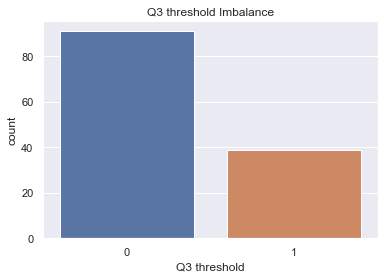

In [22]:
# Create a plot with Seaborn.
import seaborn as sns

sns.set_theme(style='darkgrid')
ax = sns.countplot(x='Q3 threshold', data=accel_7_fast_and_stop_copy)
ax.set_title('Q3 threshold Imbalance')

In [23]:
# Import all the necessary packages:
import statsmodels.api as sm   
import imblearn
from imblearn.over_sampling import SMOTE  
from sklearn.model_selection import train_test_split 

import warnings  
warnings.filterwarnings('ignore')

In [24]:
# Select necessary columns: 
nec_cols = [ 'time_seconds_delta', 'fAmag_norm']

X = accel_7_fast_and_stop_copy[nec_cols]
y = accel_7_fast_and_stop_copy.loc[:, accel_7_fast_and_stop_copy.columns =='Q3 threshold']

# Apply SMOTE class as the target variable is not balanced.
os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Specify the new data sets.
os_data_X, os_data_y = os.fit_resample(X_train, y_train)  

# Create two DataFrames for X and one for y:
os_data_X = pd.DataFrame(data = os_data_X, columns = X.columns) 

os_data_y = pd.DataFrame(data = os_data_y, columns = ['Q3 threshold'])

# View DataFrame.
print(os_data_X.head())
os_data_y.head()

   time_seconds_delta  fAmag_norm
0               0.722    1.000000
1               0.091    0.039205
2               0.090    0.052155
3               0.094    0.037931
4               3.018    0.101357


,Q3 threshold
0,1
1,0
2,0
3,0
4,0


In [25]:
os_data_y['Q3 threshold'].value_counts()

1    62
0    62
Name: Q3 threshold, dtype: int64

Text(0.5, 1.0, 'New Balanced Q3 threshold')

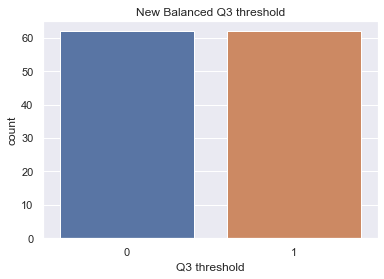

In [26]:
sns.set_theme(style ='darkgrid')
ax = sns.countplot(x ='Q3 threshold', data = os_data_y)
ax.set_title("New Balanced Q3 threshold")

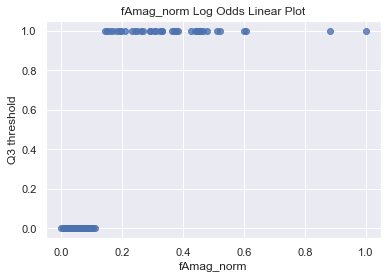

In [27]:
# The Box-Tidwell test can be used to explore whether the independent variables () are linearly related to the log odds (Assumption 5). 
#However, the Box-Tidwell test is only applicable to continuous variables.

fAmag_norm = sns.regplot(x = 'fAmag_norm',
                  y= 'Q3 threshold',
                  data=accel_7_fast_and_stop_copy,
                  logistic= True).set_title("fAmag_norm Log Odds Linear Plot")

In [28]:
# Name the new DataFrame and specify all the columns for BLR:
nec_cols = [ 'time_seconds_delta', 'fAmag_norm']

# Set the independent variable.
X = os_data_X[nec_cols]  

# Set the dependent variable.
y = os_data_y['Q3 threshold']  

# Set the logit() to accept y and x as parameters and return the logit object:
logit_model_1=sm.Logit(y, X)

# Indicate result = logit_model.fit() function.
result = logit_model_1.fit()  

# Print the results.
result.summary()

Optimization terminated successfully.
         Current function value: 0.405046
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           Q3 threshold   No. Observations:                  124
Model:                          Logit   Df Residuals:                      122
Method:                           MLE   Df Model:                            1
Date:                Fri, 28 Oct 2022   Pseudo R-squ.:                  0.4156
Time:                        10:34:46   Log-Likelihood:                -50.226
converged:                       True   LL-Null:                       -85.950
Covariance Type:            nonrobust   LLR p-value:                 2.845e-17
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
time_seconds_delta    -3.9062      1.034     -3.777      0.000      -5.933      -1.879
fAmag_norm            14.7376      3.399      4.336      0.000       8.076      21.399
======================================================================================
"""

In [29]:
# Import necessary packages:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# Split X and y data sets into ‘train’ and ‘test’ in a 30:70 ratio:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=0)

# Set LogisticRegression() to logreg.
logreg = LogisticRegression() 

# Fit the X_train and y_train data sets to logreg. 
logreg.fit(X_train, y_train) 

LogisticRegression()

In [30]:
# Determine BLR model’s accuracy:
y_pred = logreg.predict(X_test)

print('Accuracy of logistic regression classifier on test set: {:.2f}'\
      .format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.92


<AxesSubplot:>

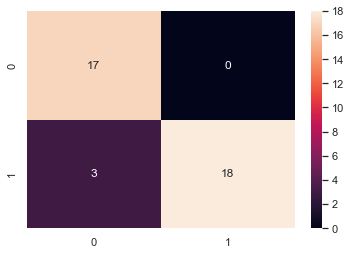

In [31]:
# Create the confusion matrix to test classification accuracy in BLR:
# Import the necessary package to create the confusion matrix. 
from sklearn.metrics import confusion_matrix  

# Indicate the confusion matrix needs to be created.
confusion_matrix = confusion_matrix(y_test, y_pred)  

# Plot the confusion_matrix.
sns.heatmap(confusion_matrix, annot=True, fmt='g')

In [32]:
# Import the necessary package.
from sklearn.metrics import classification_report  

# Print a report on the model's accuracy.
print(classification_report(y_test, y_pred))  

              precision    recall  f1-score   support

           0       0.85      1.00      0.92        17
           1       1.00      0.86      0.92        21

    accuracy                           0.92        38
   macro avg       0.93      0.93      0.92        38
weighted avg       0.93      0.92      0.92        38



In [33]:
nec_cols = [ 'time_seconds_delta', 'fAmag_norm']

X = IOT_accel[nec_cols]

In [34]:
# Predict the abnormal behaviour
y_pred = logreg.predict(X)

In [35]:
IOT_accel['Accel_7_fast_stop_BLR']=y_pred

In [36]:
IOT_accel.head()

,time,time_seconds_delta,Amag,fAmag_norm,Accel_7_fast_stop_BLR
0,0.004313,0.000000,0.311,0.003577,0
1,0.016459,0.012146,0.121,0.001327,0
2,0.022998,0.006539,0.136,0.001504,0
3,0.033322,0.010324,0.146,0.001623,0
4,0.042877,0.009555,0.108,0.001173,0


In [37]:
IOT_accel['Accel_7_fast_stop_BLR'].value_counts()

0    81763
1     2389
Name: Accel_7_fast_stop_BLR, dtype: int64

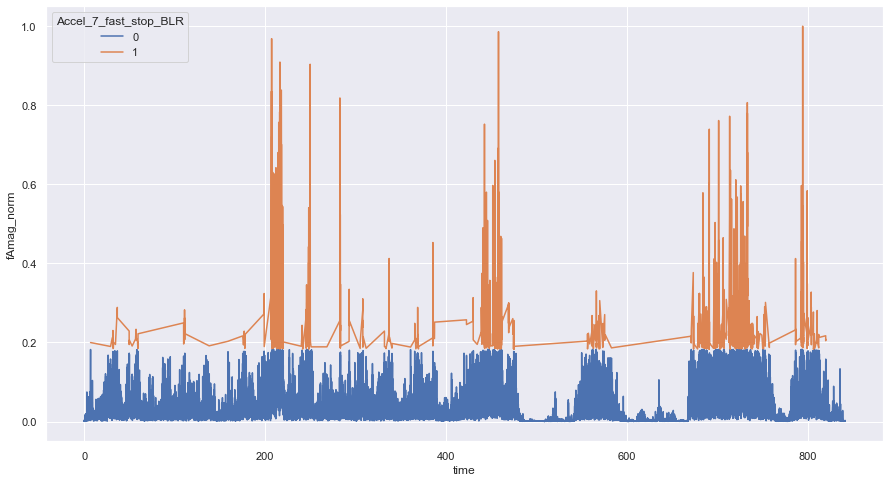

In [38]:
plt.figure(figsize=(15,8))
sns.lineplot(data=IOT_accel, x='time', y='fAmag_norm', hue='Accel_7_fast_stop_BLR')
plt.savefig('Accel 7 Fast Stop.png')  

## Gyro_1_curb_up - BLR Model

In [39]:
Gyro_1_curb_up=pd.read_csv('Gyro_1_curb_up_normal_vs_abnormal.csv')

In [40]:
Gyro_1_curb_up.head()

,Unnamed: 0,time_seconds,time_seconds_delta,Timestamp,Data,X,Y,Z,Gmag,Gmag_norm,Q3 threshold,Std threshold,HO threshold
0,0,68004.751,0.000,18:53:24:751,0000187888 [app] INFO: GYRO:,7.016,0.871,-2.113,7.378866,0.10137,Normal data,Normal data,Normal data
1,1,68004.841,0.090,18:53:24:841,0000187977 [app] INFO: GYRO:,7.016,0.871,-2.113,7.378866,0.10137,Normal data,Normal data,Normal data
2,2,68004.930,0.089,18:53:24:930,0000188067 [app] INFO: GYRO:,7.016,0.871,-2.113,7.378866,0.10137,Normal data,Normal data,Normal data
3,3,68005.023,0.093,18:53:25:023,0000188157 [app] INFO: GYRO:,7.016,0.871,-2.113,7.378866,0.10137,Normal data,Normal data,Normal data
4,4,68005.113,0.090,18:53:25:113,0000188247 [app] INFO: GYRO:,7.016,0.871,-2.113,7.378866,0.10137,Normal data,Normal data,Normal data


In [41]:
# Create new column with necessary columns
Gyro_1_curb_up_copy = Gyro_1_curb_up[['time_seconds', 'time_seconds_delta', 'Gmag_norm', 'Q3 threshold','Std threshold', 'HO threshold']]

In [42]:
# Replace Normal Data as 0 and Abnormal Data as 1
# Assumptions for BLR
# Assumption 1: Binary logistic regression requires the dependent variable to be binary.
# Assumption 2: For a binary logistic regression, the factor level 1 of the dependent variable should represent the desired outcome.
Gyro_1_curb_up_copy = Gyro_1_curb_up_copy.replace('Normal data', 0)
Gyro_1_curb_up_copy = Gyro_1_curb_up_copy.replace('Abnormal data', 1)

In [43]:
Gyro_1_curb_up_copy.head()

,time_seconds,time_seconds_delta,Gmag_norm,Q3 threshold,Std threshold,HO threshold
0,68004.751,0.000,0.10137,0,0,0
1,68004.841,0.090,0.10137,0,0,0
2,68004.930,0.089,0.10137,0,0,0
3,68005.023,0.093,0.10137,0,0,0
4,68005.113,0.090,0.10137,0,0,0


Text(0.5, 1.0, 'Q3 threshold Imbalance')

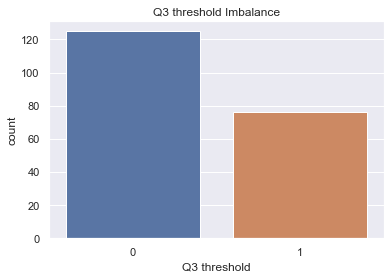

In [44]:
# Create a plot with Seaborn.
sns.set_theme(style='darkgrid')
ax = sns.countplot(x='Q3 threshold', data = Gyro_1_curb_up_copy)
ax.set_title('Q3 threshold Imbalance')

In [45]:
# Select necessary columns: 
nec_cols = [ 'time_seconds_delta', 'Gmag_norm']

X = Gyro_1_curb_up_copy[nec_cols]
y = Gyro_1_curb_up_copy.loc[:, Gyro_1_curb_up_copy.columns =='Q3 threshold']

# Apply SMOTE class as the target variable is not balanced.
os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Specify the new data sets.
os_data_X, os_data_y = os.fit_resample(X_train, y_train)  

# Create two DataFrames for X and one for y:
os_data_X = pd.DataFrame(data = os_data_X, columns = X.columns) 

os_data_y = pd.DataFrame(data = os_data_y, columns = ['Q3 threshold'])

# View DataFrame.
print(os_data_X.head())
os_data_y.head()

   time_seconds_delta  Gmag_norm
0               0.178   0.000000
1               0.091   0.398645
2               0.092   0.101370
3               0.089   0.155570
4               0.093   0.000000


,Q3 threshold
0,0
1,1
2,0
3,0
4,0


In [46]:
os_data_y['Q3 threshold'].value_counts()

0    85
1    85
Name: Q3 threshold, dtype: int64

Text(0.5, 1.0, 'New Balanced Q3 threshold')

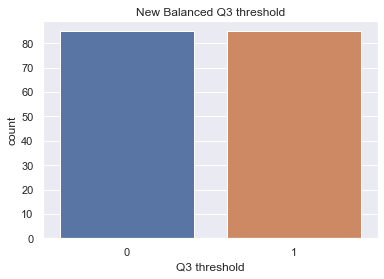

In [47]:
sns.set_theme(style ='darkgrid')
ax = sns.countplot(x ='Q3 threshold', data = os_data_y)
ax.set_title("New Balanced Q3 threshold")

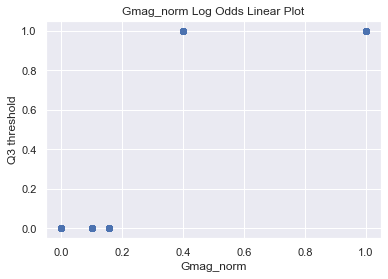

In [48]:
# The Box-Tidwell test can be used to explore whether the independent variables () are linearly related to the log odds (Assumption 5). 
#However, the Box-Tidwell test is only applicable to continuous variables.

Gmag_norm = sns.regplot(x = 'Gmag_norm',
                  y = 'Q3 threshold',
                  data = Gyro_1_curb_up_copy,
                  logistic = True).set_title("Gmag_norm Log Odds Linear Plot")

In [49]:
# Name the new DataFrame and specify all the columns for BLR:
nec_cols = [ 'time_seconds_delta', 'Gmag_norm']

# Set the independent variable.
X = os_data_X[nec_cols]  

# Set the dependent variable.
y = os_data_y['Q3 threshold']  

# Set the logit() to accept y and x as parameters and return the logit object:
logit_model_2=sm.Logit(y, X)

# Indicate result = logit_model.fit() function.
result = logit_model_2.fit()  

# Print the results.
result.summary()

Optimization terminated successfully.
         Current function value: 0.067294
         Iterations 12


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           Q3 threshold   No. Observations:                  170
Model:                          Logit   Df Residuals:                      168
Method:                           MLE   Df Model:                            1
Date:                Fri, 28 Oct 2022   Pseudo R-squ.:                  0.9029
Time:                        10:34:58   Log-Likelihood:                -11.440
converged:                       True   LL-Null:                       -117.84
Covariance Type:            nonrobust   LLR p-value:                 3.382e-48
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
time_seconds_delta   -78.0108     20.956     -3.723      0.000    -119.083     -36.938
Gmag_norm             35.9484     11.552      3.112      0.002      13.307      58.590
======================================================================================

Possibly complete quasi-separation: A fraction 0.43 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [50]:
# Split X and y data sets into ‘train’ and ‘test’ in a 30:70 ratio:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=0)

# Set LogisticRegression() to logreg.
logreg = LogisticRegression() 

# Fit the X_train and y_train data sets to logreg. 
logreg.fit(X_train, y_train) 

LogisticRegression()

In [51]:
# Determine BLR model’s accuracy:
y_pred = logreg.predict(X_test)

print('Accuracy of logistic regression classifier on test set: {:.2f}'\
      .format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 1.00


<AxesSubplot:>

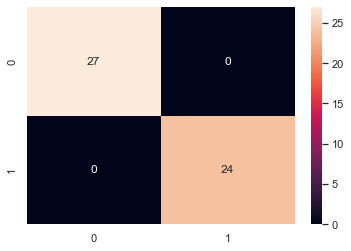

In [52]:
# Create the confusion matrix to test classification accuracy in BLR: 
# Import the necessary package to create the confusion matrix. 
from sklearn.metrics import confusion_matrix  

# Indicate the confusion matrix needs to be created.
confusion_matrix = confusion_matrix(y_test, y_pred)  

# Plot the confusion_matrix.
sns.heatmap(confusion_matrix, annot=True, fmt='g')

In [53]:
# Print a report on the model's accuracy.
print(classification_report(y_test, y_pred))  

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       1.00      1.00      1.00        24

    accuracy                           1.00        51
   macro avg       1.00      1.00      1.00        51
weighted avg       1.00      1.00      1.00        51



In [54]:
nec_cols = [ 'time_seconds_delta', 'Gmag_norm']
X = IOT_gyro[nec_cols]

In [55]:
# Predict the abnormal behaviour
y_pred = logreg.predict(X)

In [56]:
IOT_gyro['IOT_gyro_1_curb_up_BLR']=y_pred

In [57]:
IOT_gyro.head()

,time,time_seconds_delta,Gmag,Gmag_norm,IOT_gyro_1_curb_up_BLR
0,0.000821,0.000000,0.0,0.0,0
1,0.000997,0.000176,0.0,0.0,0
2,0.001085,0.000088,0.0,0.0,0
3,0.001171,0.000086,0.0,0.0,0
4,0.002772,0.001601,0.0,0.0,0


In [58]:
IOT_gyro['IOT_gyro_1_curb_up_BLR'].value_counts()

0    512027
1      6194
Name: IOT_gyro_1_curb_up_BLR, dtype: int64

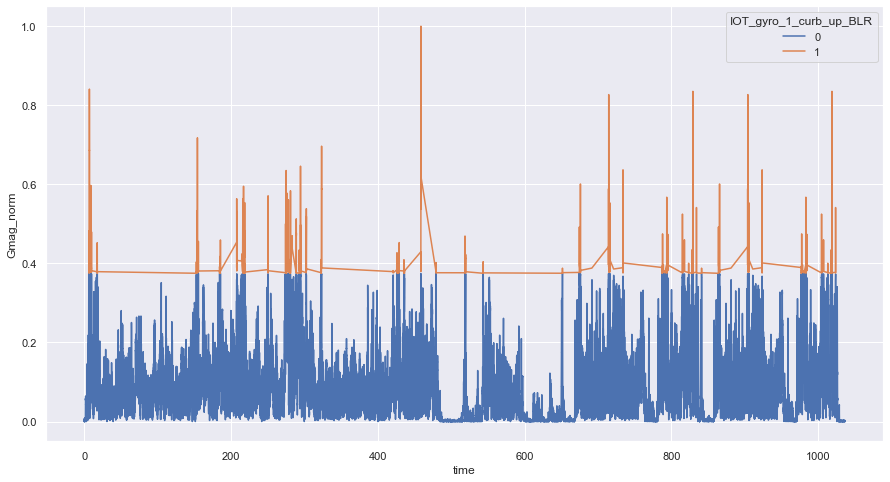

In [59]:
plt.figure(figsize = (15,8))
sns.lineplot(data = IOT_gyro, x='time', y='Gmag_norm', hue='IOT_gyro_1_curb_up_BLR')
plt.savefig("Gyro_1_curb_up.png")

## Gyro_2_curb_up - BLR Model

In [60]:
Gyro_2_curb_up=pd.read_csv('Gyro_2_curb_up_normal_vs_abnormal.csv')

In [61]:
Gyro_2_curb_up.head()

,Unnamed: 0,time_seconds,time_seconds_delta,Timestamp,Data,X,Y,Z,Gmag,Gmag_norm,Q3 threshold,Std threshold,HO threshold
0,0,68043.946,0.000,18:54:03:946,0000227081 [app] INFO: GYRO:,-0.505,0.402,0.167,0.666722,0.0,Normal data,Normal data,Normal data
1,1,68044.082,0.136,18:54:04:082,0000227172 [app] INFO: GYRO:,-0.505,0.402,0.167,0.666722,0.0,Normal data,Normal data,Normal data
2,2,68044.176,0.094,18:54:04:176,0000227307 [app] INFO: GYRO:,-0.505,0.402,0.167,0.666722,0.0,Normal data,Normal data,Normal data
3,3,68044.261,0.085,18:54:04:261,0000227397 [app] INFO: GYRO:,-0.505,0.402,0.167,0.666722,0.0,Normal data,Normal data,Normal data
4,4,68044.357,0.096,18:54:04:357,0000227487 [app] INFO: GYRO:,-0.505,0.402,0.167,0.666722,0.0,Normal data,Normal data,Normal data


In [62]:
# Create new column with necessary columns
Gyro_2_curb_up_copy = Gyro_2_curb_up[['time_seconds', 'time_seconds_delta', 'Gmag_norm', 'Q3 threshold','Std threshold', 'HO threshold']]

In [63]:
# Replace Normal Data as 0 and Abnormal Data as 1
# Assumptions for BLR
# Assumption 1: Binary logistic regression requires the dependent variable to be binary.
# Assumption 2: For a binary logistic regression, the factor level 1 of the dependent variable should represent the desired outcome.
Gyro_2_curb_up_copy = Gyro_2_curb_up_copy.replace('Normal data', 0)
Gyro_2_curb_up_copy = Gyro_2_curb_up_copy.replace('Abnormal data', 1)

In [64]:
Gyro_2_curb_up_copy.head()

,time_seconds,time_seconds_delta,Gmag_norm,Q3 threshold,Std threshold,HO threshold
0,68043.946,0.000,0.0,0,0,0
1,68044.082,0.136,0.0,0,0,0
2,68044.176,0.094,0.0,0,0,0
3,68044.261,0.085,0.0,0,0,0
4,68044.357,0.096,0.0,0,0,0


Text(0.5, 1.0, 'Q3 threshold Imbalance')

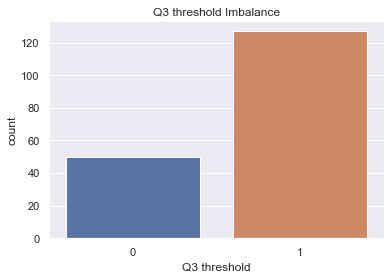

In [65]:
# Create a plot with Seaborn.

sns.set_theme(style='darkgrid')
ax = sns.countplot(x='Q3 threshold', data = Gyro_2_curb_up_copy)
ax.set_title('Q3 threshold Imbalance')

In [66]:
# Select necessary columns: 
nec_cols = [ 'time_seconds_delta', 'Gmag_norm']

X = Gyro_2_curb_up_copy[nec_cols]
y = Gyro_2_curb_up_copy.loc[:, Gyro_2_curb_up_copy.columns =='Q3 threshold']

# Apply SMOTE class as the target variable is not balanced.
os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Specify the new data sets.
os_data_X, os_data_y = os.fit_resample(X_train, y_train)  

# Create two DataFrames for X and one for y:
os_data_X = pd.DataFrame(data = os_data_X, columns = X.columns) 

os_data_y = pd.DataFrame(data = os_data_y, columns = ['Q3 threshold'])

# View DataFrame.
print(os_data_X.head())
os_data_y.head()

   time_seconds_delta  Gmag_norm
0               0.089   0.000000
1               0.136   1.000000
2               0.271   1.000000
3               0.088   1.000000
4               0.094   0.571989


,Q3 threshold
0,0
1,1
2,1
3,1
4,1


In [67]:
os_data_y['Q3 threshold'].value_counts()

0    88
1    88
Name: Q3 threshold, dtype: int64

Text(0.5, 1.0, 'New Balanced Q3 threshold')

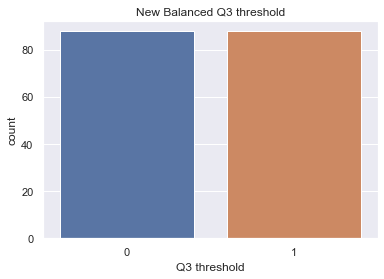

In [68]:
sns.set_theme(style ='darkgrid')
ax = sns.countplot(x ='Q3 threshold', data = os_data_y)
ax.set_title("New Balanced Q3 threshold")

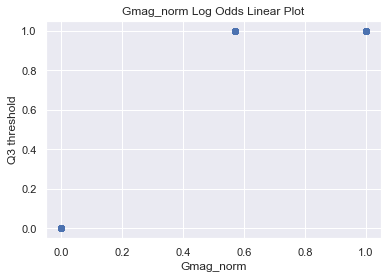

In [69]:
# The Box-Tidwell test can be used to explore whether the independent variables () are linearly related to the log odds (Assumption 5). 
#However, the Box-Tidwell test is only applicable to continuous variables.

Gmag_norm = sns.regplot(x = 'Gmag_norm',
                  y = 'Q3 threshold',
                  data = Gyro_2_curb_up_copy,
                  logistic = True).set_title("Gmag_norm Log Odds Linear Plot")

In [70]:
# Name the new DataFrame and specify all the columns for BLR:
nec_cols = [ 'time_seconds_delta', 'Gmag_norm']

# Set the independent variable.
X = os_data_X[nec_cols]  

# Set the dependent variable.
y = os_data_y['Q3 threshold']  

# Set the logit() to accept y and x as parameters and return the logit object:
logit_model_3=sm.Logit(y, X)

# Indicate result = logit_model.fit() function.
result = logit_model_3.fit()  

# Print the results.
result.summary()

         Current function value: 0.003939
         Iterations: 35


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           Q3 threshold   No. Observations:                  176
Model:                          Logit   Df Residuals:                      174
Method:                           MLE   Df Model:                            1
Date:                Fri, 28 Oct 2022   Pseudo R-squ.:                  0.9943
Time:                        10:35:19   Log-Likelihood:               -0.69324
converged:                      False   LL-Null:                       -121.99
Covariance Type:            nonrobust   LLR p-value:                 1.065e-54
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
time_seconds_delta  -377.3057   4284.565     -0.088      0.930   -8774.900    8020.288
Gmag_norm            142.6422   1498.544      0.095      0.924   -2794.450    3079.735
======================================================================================

Possibly complete quasi-separation: A fraction 0.99 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [71]:
# Import necessary packages:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# Split X and y data sets into ‘train’ and ‘test’ in a 30:70 ratio:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=0)

# Set LogisticRegression() to logreg.
logreg = LogisticRegression() 

# Fit the X_train and y_train data sets to logreg. 
logreg.fit(X_train, y_train) 

LogisticRegression()

In [72]:
# Determine BLR model’s accuracy:
y_pred = logreg.predict(X_test)

print('Accuracy of logistic regression classifier on test set: {:.2f}'\
      .format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 1.00


<AxesSubplot:>

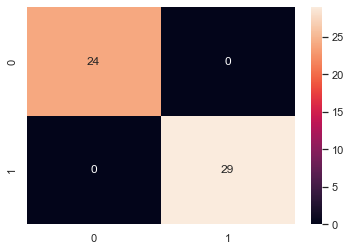

In [73]:
# Create the confusion matrix to test classification accuracy in BLR: 
# Import the necessary package to create the confusion matrix. 
from sklearn.metrics import confusion_matrix  

# Indicate the confusion matrix needs to be created.
confusion_matrix = confusion_matrix(y_test, y_pred)  

# Plot the confusion_matrix.
sns.heatmap(confusion_matrix, annot=True, fmt='g')

In [74]:
# Print a report on the model's accuracy.
print(classification_report(y_test, y_pred)) 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        24
           1       1.00      1.00      1.00        29

    accuracy                           1.00        53
   macro avg       1.00      1.00      1.00        53
weighted avg       1.00      1.00      1.00        53



In [75]:
nec_cols = [ 'time_seconds_delta', 'Gmag_norm']
X = IOT_gyro[nec_cols]

In [76]:
# Predict the abnormal behaviour
y_pred = logreg.predict(X)

In [77]:
IOT_gyro['IOT_gyro_2_curb_up_BLR']=y_pred

In [78]:
IOT_gyro.head()

,time,time_seconds_delta,Gmag,Gmag_norm,IOT_gyro_1_curb_up_BLR,IOT_gyro_2_curb_up_BLR
0,0.000821,0.000000,0.0,0.0,0,0
1,0.000997,0.000176,0.0,0.0,0,0
2,0.001085,0.000088,0.0,0.0,0,0
3,0.001171,0.000086,0.0,0.0,0,0
4,0.002772,0.001601,0.0,0.0,0,0


In [79]:
IOT_gyro['IOT_gyro_2_curb_up_BLR'].value_counts()

0    512716
1      5505
Name: IOT_gyro_2_curb_up_BLR, dtype: int64

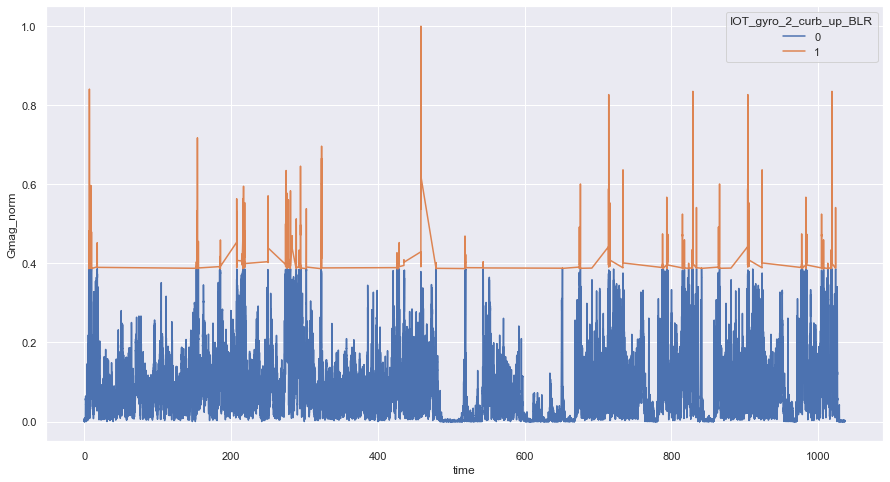

In [80]:
plt.figure(figsize = (15,8))
sns.lineplot(data = IOT_gyro, x='time', y='Gmag_norm', hue='IOT_gyro_2_curb_up_BLR')
plt.savefig("Gyro_2_curb_up.png")

## BLR model could not fit on Gyro_3_curb_up file. Therefore excluded from analysis.
PerfectSeparationError: Perfect separation detected, results not available


## BLR model could not fit on Gyro_4_throwing_bike file. Therefore excluded from analysis.

Warning: Maximum number of iterations has been exceeded.
         Current function value: inf
         Iterations: 35
            
LinAlgError: Singular matrix


## BLR model could not fit on Gyro_5_throwing_bike file. Therefore excluded from analysis.

Warning: Maximum number of iterations has been exceeded.
         Current function value: inf
         Iterations: 35
            
LinAlgError: Singular matrix

## Since we dont have a working model for throw bike incident, decided to built Decision Tree Model for this incident.

## Gyro_4_throwing_bike - DTC

In [81]:
Gyro_4_throwing_bike=pd.read_csv('Gyro_4_throwing_bike_normal_vs_abnormal.csv')

In [82]:
Gyro_4_throwing_bike.head()

,Unnamed: 0,time_seconds,time_seconds_delta,Timestamp,Data,X,Y,Z,Gmag,Gmag_norm,Q3 threshold,Std threshold,HO threshold
0,0,68143.665,0.000,18:55:43:665,0000326756 [app] INFO: GYRO:,-4.695,-0.52,19.148,19.722052,0.848702,Abnormal data,Abnormal data,Abnormal data
1,1,68143.800,0.135,18:55:43:800,0000326898 [app] INFO: GYRO:,-4.695,-0.52,19.148,19.722052,0.848702,Abnormal data,Abnormal data,Abnormal data
2,2,68143.891,0.091,18:55:43:891,0000327026 [app] INFO: GYRO:,-4.695,-0.52,19.148,19.722052,0.848702,Abnormal data,Abnormal data,Abnormal data
3,3,68144.027,0.136,18:55:44:027,0000327116 [app] INFO: GYRO:,-4.695,-0.52,19.148,19.722052,0.848702,Abnormal data,Abnormal data,Abnormal data
4,4,68144.117,0.090,18:55:44:117,0000327251 [app] INFO: GYRO:,-4.695,-0.52,19.148,19.722052,0.848702,Abnormal data,Abnormal data,Abnormal data


In [83]:
# Create new df with necessary columns
Gyro_4_throwing_bike_copy=Gyro_4_throwing_bike[['time_seconds', 'time_seconds_delta', 'Gmag_norm', 'Q3 threshold','Std threshold', 'HO threshold']]

In [84]:
# Replace Normal Data as 0 and Abnormal Data as 1
Gyro_4_throwing_bike_copy=Gyro_4_throwing_bike_copy.replace('Normal data', 0)
Gyro_4_throwing_bike_copy=Gyro_4_throwing_bike_copy.replace('Abnormal data', 1)

In [85]:
Gyro_4_throwing_bike_copy.head()

,time_seconds,time_seconds_delta,Gmag_norm,Q3 threshold,Std threshold,HO threshold
0,68143.665,0.000,0.848702,1,1,1
1,68143.800,0.135,0.848702,1,1,1
2,68143.891,0.091,0.848702,1,1,1
3,68144.027,0.136,0.848702,1,1,1
4,68144.117,0.090,0.848702,1,1,1


In [86]:
# Select necessary columns: 
nec_cols = [ 'time_seconds_delta', 'Gmag_norm']

X = Gyro_4_throwing_bike_copy[nec_cols]
y = Gyro_4_throwing_bike_copy['Q3 threshold']

# Create a new DataFrame and 
# apply SMOTE as the target variable is not balanced.
os = SMOTE(random_state=0)  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Specify column values.
columns = X_train.columns  
# Specify the new data sets.
os_data_X,os_data_y=os.fit_resample(X_train, y_train)  

# Create two DataFrames for X and one for y:
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['Q3 threshold'])

# Print/check the DataFrame:
print("length of oversampled data is ",len(os_data_X))

os_data_y

length of oversampled data is  164


,Q3 threshold
0,1
1,0
2,0
3,0
4,0
...,...
159,1
160,1
161,1
162,1


In [87]:
os_data_y.value_counts()

Q3 threshold
0               82
1               82
dtype: int64

In [88]:
# Import the DecisionTreeClassifier class from sklearn. 
from sklearn.tree import DecisionTreeClassifier  

# Create a classification decision tree classifier object as dtc: 
dtc_1 = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=1)

# Train the decision tree classifier.
dtc_1 = dtc_1.fit(os_data_X, os_data_y) 

# Predict the response for the test data set.
y_pred = dtc_1.predict(X_test) 

In [89]:
# Import scikit-learn metrics module for accuracy calculation:
from sklearn.metrics import confusion_matrix

# Use the print() function to display the confusion matrix results:
print(confusion_matrix(y_test, y_pred))

# Metrics for accuracy.
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)) 

# Metrics for precision. 
print("Precision:",metrics.precision_score(y_test, y_pred)) 

# Metrics for recall.
print("Recall:",metrics.recall_score(y_test, y_pred)) 

[[37  0]
 [ 0 18]]
Accuracy: 1.0
Precision: 1.0
Recall: 1.0


In [90]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       1.00      1.00      1.00        18

    accuracy                           1.00        55
   macro avg       1.00      1.00      1.00        55
weighted avg       1.00      1.00      1.00        55



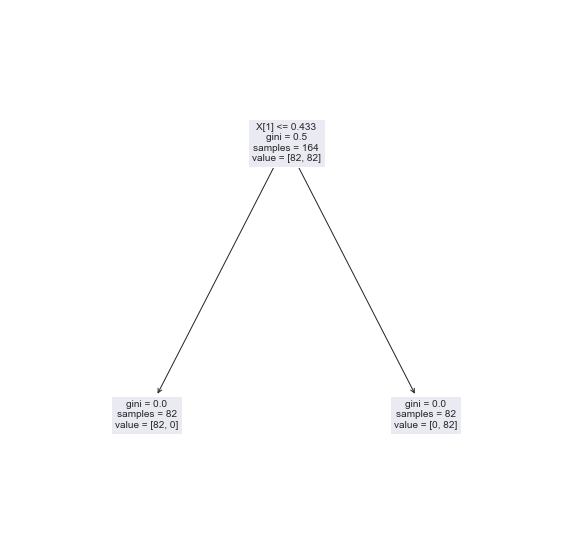

In [91]:
# Import matplotlib to create a visualisation 
# and the tree package from sklearn:
import matplotlib.pyplot as plt 
from sklearn import tree

# Plot the decision tree to create the visualisation:
fig, ax = plt.subplots(figsize=(10, 10))
tree.plot_tree(dtc_1, fontsize=10)

# Print the plot with plt.show().
plt.show()  

In [92]:
nec_cols = [ 'time_seconds_delta', 'Gmag_norm']

X = IOT_gyro[nec_cols]

In [93]:
# Predict the abnormal behaviour
y_pred = dtc_1.predict(X) 

In [94]:
IOT_gyro['Throw_bike_Gyro_4_DTC']=y_pred

In [95]:
IOT_gyro.head()

,time,time_seconds_delta,Gmag,Gmag_norm,IOT_gyro_1_curb_up_BLR,IOT_gyro_2_curb_up_BLR,Throw_bike_Gyro_4_DTC
0,0.000821,0.000000,0.0,0.0,0,0,0
1,0.000997,0.000176,0.0,0.0,0,0,0
2,0.001085,0.000088,0.0,0.0,0,0,0
3,0.001171,0.000086,0.0,0.0,0,0,0
4,0.002772,0.001601,0.0,0.0,0,0,0


In [96]:
IOT_gyro['Throw_bike_Gyro_4_DTC'].value_counts()

0    514703
1      3518
Name: Throw_bike_Gyro_4_DTC, dtype: int64

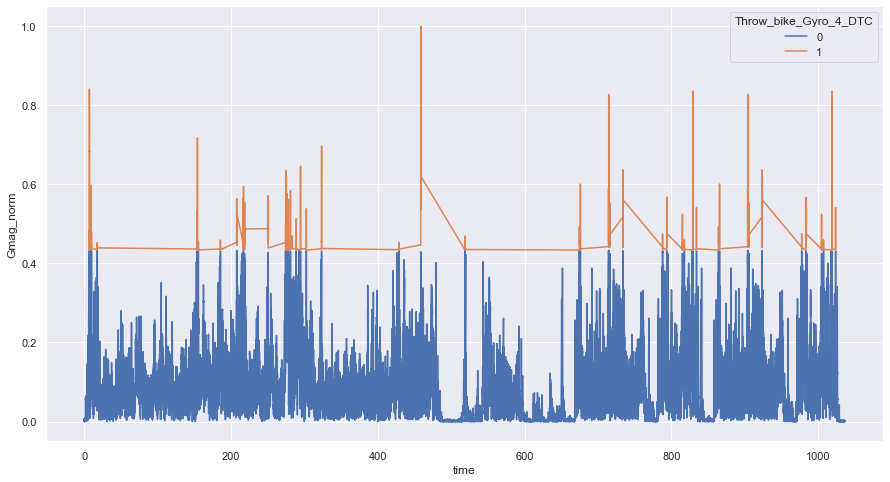

In [97]:
plt.figure(figsize=(15,8))
sns.lineplot(data=IOT_gyro, x='time', y='Gmag_norm', hue='Throw_bike_Gyro_4_DTC')
plt.savefig("Throw Bike Gyro 4.png")

## Gyro_5_throwing_bike - DTC

In [98]:
Gyro_5_throwing_bike=pd.read_csv('Gyro_5_throwing_bike_normal_vs_abnormal.csv')

In [99]:
Gyro_5_throwing_bike.head()

,Unnamed: 0,time_seconds,time_seconds_delta,Timestamp,Data,X,Y,Z,Gmag,Gmag_norm,Q3 threshold,Std threshold,HO threshold
0,0,68196.812,0.000,18:56:36:812,0000379945 [app] INFO: GYRO:,0.066,0.027,0.901,0.903817,0.0,Normal data,Normal data,Normal data
1,1,68196.902,0.090,18:56:36:902,0000380036 [app] INFO: GYRO:,0.066,0.027,0.901,0.903817,0.0,Normal data,Normal data,Normal data
2,2,68196.992,0.090,18:56:36:992,0000380126 [app] INFO: GYRO:,0.066,0.027,0.901,0.903817,0.0,Normal data,Normal data,Normal data
3,3,68197.082,0.090,18:56:37:082,0000380216 [app] INFO: GYRO:,0.066,0.027,0.901,0.903817,0.0,Normal data,Normal data,Normal data
4,4,68197.171,0.089,18:56:37:171,0000380306 [app] INFO: GYRO:,0.066,0.027,0.901,0.903817,0.0,Normal data,Normal data,Normal data


In [100]:
# Create new df with necessary columns
Gyro_5_throwing_bike_copy=Gyro_5_throwing_bike[['time_seconds', 'time_seconds_delta', 'Gmag_norm', 'Q3 threshold','Std threshold', 'HO threshold']]

In [101]:
# Replace Normal Data as 0 and Abnormal Data as 1
# Assumptions for BLR
# Assumption 1: Binary logistic regression requires the dependent variable to be binary.
# Assumption 2: For a binary logistic regression, the factor level 1 of the dependent variable should represent the desired outcome.
Gyro_5_throwing_bike_copy=Gyro_5_throwing_bike_copy.replace('Normal data', 0)
Gyro_5_throwing_bike_copy=Gyro_5_throwing_bike_copy.replace('Abnormal data', 1)

In [102]:
Gyro_5_throwing_bike_copy.head()

,time_seconds,time_seconds_delta,Gmag_norm,Q3 threshold,Std threshold,HO threshold
0,68196.812,0.000,0.0,0,0,0
1,68196.902,0.090,0.0,0,0,0
2,68196.992,0.090,0.0,0,0,0
3,68197.082,0.090,0.0,0,0,0
4,68197.171,0.089,0.0,0,0,0


In [103]:
# Select necessary columns: 
nec_cols = [ 'time_seconds_delta', 'Gmag_norm']

X = Gyro_5_throwing_bike_copy[nec_cols]
y = Gyro_5_throwing_bike_copy['Q3 threshold']

# Create a new DataFrame and 
# apply SMOTE as the target variable is not balanced.
os = SMOTE(random_state=0)  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Specify column values.
columns = X_train.columns  
# Specify the new data sets.
os_data_X,os_data_y=os.fit_resample(X_train, y_train)  

# Create two DataFrames for X and one for y:
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['Q3 threshold'])

# Print/check the DataFrame:
print("length of oversampled data is ",len(os_data_X))

os_data_y

length of oversampled data is  68


,Q3 threshold
0,1
1,0
2,0
3,0
4,1
...,...
63,1
64,1
65,1
66,1


In [104]:
os_data_y.value_counts()

Q3 threshold
0               34
1               34
dtype: int64

In [105]:
# Import the DecisionTreeClassifier class from sklearn. 
from sklearn.tree import DecisionTreeClassifier  

# Create a classification decision tree classifier object as dtc: 
dtc_2 = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=1)

# Train the decision tree classifier.
dtc_2 = dtc_2.fit(os_data_X, os_data_y) 

# Predict the response for the test data set.
y_pred = dtc_2.predict(X_test) 

In [106]:
# Import scikit-learn metrics module for accuracy calculation:
from sklearn.metrics import confusion_matrix

# Use the print() function to display the confusion matrix results:
print(confusion_matrix(y_test, y_pred))

# Metrics for accuracy.
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)) 

# Metrics for precision. 
print("Precision:",metrics.precision_score(y_test, y_pred)) 

# Metrics for recall.
print("Recall:",metrics.recall_score(y_test, y_pred)) 

[[18  0]
 [ 0 12]]
Accuracy: 1.0
Precision: 1.0
Recall: 1.0


In [107]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        12

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



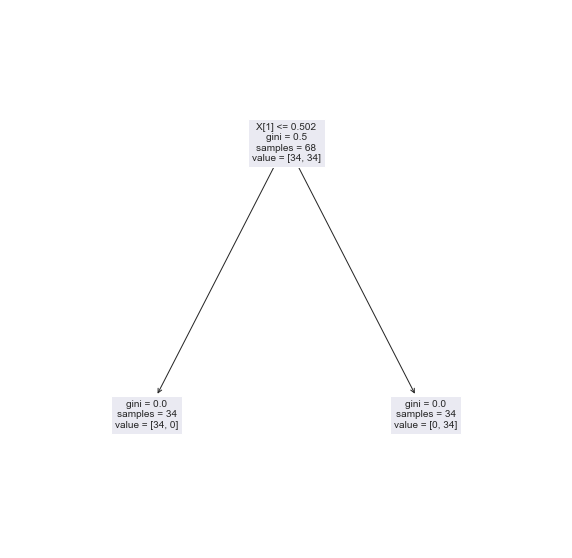

In [108]:
# Import matplotlib to create a visualisation 
# and the tree package from sklearn:
import matplotlib.pyplot as plt 
from sklearn import tree

# Plot the decision tree to create the visualisation:
fig, ax = plt.subplots(figsize=(10, 10))
tree.plot_tree(dtc_2, fontsize=10)

# Print the plot with plt.show().
plt.show()  

In [109]:
nec_cols = [ 'time_seconds_delta', 'Gmag_norm']

X = IOT_gyro[nec_cols]

In [110]:
# Predict the abnormal behaviour
y_pred = dtc_2.predict(X) 

In [111]:
IOT_gyro['Throw_bike_Gyro_5_DTC']=y_pred

In [112]:
IOT_gyro.head()

,time,time_seconds_delta,Gmag,Gmag_norm,IOT_gyro_1_curb_up_BLR,IOT_gyro_2_curb_up_BLR,Throw_bike_Gyro_4_DTC,Throw_bike_Gyro_5_DTC
0,0.000821,0.000000,0.0,0.0,0,0,0,0
1,0.000997,0.000176,0.0,0.0,0,0,0,0
2,0.001085,0.000088,0.0,0.0,0,0,0,0
3,0.001171,0.000086,0.0,0.0,0,0,0,0
4,0.002772,0.001601,0.0,0.0,0,0,0,0


In [113]:
IOT_gyro['Throw_bike_Gyro_5_DTC'].value_counts()

0    516510
1      1711
Name: Throw_bike_Gyro_5_DTC, dtype: int64

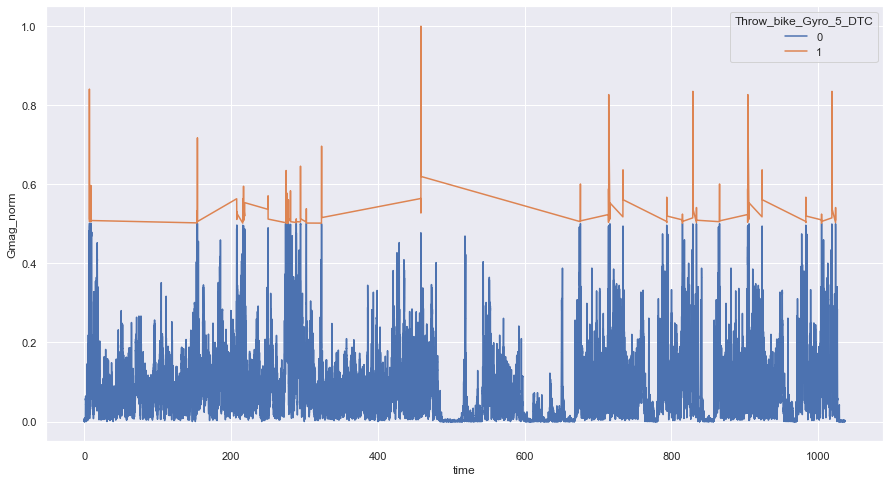

In [114]:
plt.figure(figsize=(15,8))
sns.lineplot(data=IOT_gyro, x='time', y='Gmag_norm', hue='Throw_bike_Gyro_5_DTC')
plt.savefig("Throw Bike Gyro 5.png")

## accel_8_curb_up - BLR Model

In [115]:
# Import CVS files
accel_8_curb_up = pd.read_csv('accel_8_curb_up_normal_vs_abnormal.csv')

In [116]:
accel_8_curb_up.head()

,Unnamed: 0,time_seconds,time_seconds_delta,Timestamp,AX,AY,AZ,fAX,fAY,fAZ,Amag,fAmag,fAmag_norm,Std threshold,Q3 threshold,HO threshold
0,0,0.000,0.000,1900-01-01 18:15:17.321,-1984,-1184,-128,10.911464,20.143747,38.438805,2313.978392,44.747875,0.000000,Normal data,Normal data,Normal data
1,1,4.321,4.321,1900-01-01 18:15:21.642,1120,1504,-608,5.466331,39.520996,30.415575,1971.314282,50.168686,0.003468,Normal data,Normal data,Normal data
2,2,5.087,0.766,1900-01-01 18:15:22.408,-2144,-2048,960,-33.589970,1.751053,42.425961,3116.510870,54.141615,0.006010,Normal data,Normal data,Normal data
3,3,5.399,0.312,1900-01-01 18:15:22.720,-3552,-1696,384,-99.028473,-29.657183,46.862812,3954.816810,113.500265,0.043984,Normal data,Normal data,Normal data
4,4,5.715,0.316,1900-01-01 18:15:23.036,-2880,-2720,2880,-153.310471,-80.152374,83.436729,4897.672917,192.068194,0.094247,Normal data,Normal data,Normal data


In [117]:
# Create new column with necessary columns
accel_8_curb_up_copy=accel_8_curb_up[['time_seconds', 'time_seconds_delta', 'fAmag_norm', 'Q3 threshold','Std threshold', 'HO threshold']]

In [118]:
# Replace Normal Data as 0 and Abnormal Data as 1
# Assumptions for BLR
# Assumption 1: Binary logistic regression requires the dependent variable to be binary.
# Assumption 2: For a binary logistic regression, the factor level 1 of the dependent variable should represent the desired outcome.
accel_8_curb_up_copy=accel_8_curb_up_copy.replace('Normal data', 0)
accel_8_curb_up_copy=accel_8_curb_up_copy.replace('Abnormal data', 1)

In [119]:
accel_8_curb_up_copy.head()

,time_seconds,time_seconds_delta,fAmag_norm,Q3 threshold,Std threshold,HO threshold
0,0.000,0.000,0.000000,0,0,0
1,4.321,4.321,0.003468,0,0,0
2,5.087,0.766,0.006010,0,0,0
3,5.399,0.312,0.043984,0,0,0
4,5.715,0.316,0.094247,0,0,0


Text(0.5, 1.0, 'Q3 threshold Imbalance')

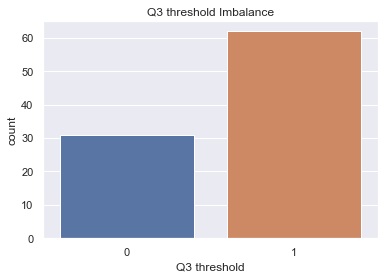

In [120]:
# Create a plot with Seaborn.
import seaborn as sns

sns.set_theme(style='darkgrid')
ax = sns.countplot(x='Q3 threshold', data=accel_8_curb_up_copy)
ax.set_title('Q3 threshold Imbalance')

In [121]:
# Import all the necessary packages:
import statsmodels.api as sm   
import imblearn
from imblearn.over_sampling import SMOTE  
from sklearn.model_selection import train_test_split 

import warnings  
warnings.filterwarnings('ignore')

In [122]:
# Select necessary columns: 
nec_cols = [ 'time_seconds_delta', 'fAmag_norm']

X = accel_8_curb_up_copy[nec_cols]
y = accel_8_curb_up_copy.loc[:, accel_8_curb_up_copy.columns =='Q3 threshold']

# Apply SMOTE class as the target variable is not balanced.
os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Specify the new data sets.
os_data_X, os_data_y = os.fit_resample(X_train, y_train)  

# Create two DataFrames for X and one for y:
os_data_X = pd.DataFrame(data = os_data_X, columns = X.columns) 

os_data_y = pd.DataFrame(data = os_data_y, columns = ['Q3 threshold'])

# View DataFrame.
print(os_data_X.head())
os_data_y.head()

   time_seconds_delta  fAmag_norm
0               0.357    0.100639
1               0.315    0.101171
2               0.087    0.099247
3               0.312    0.043984
4               0.135    0.106020


,Q3 threshold
0,0
1,0
2,0
3,0
4,0


In [123]:
os_data_y['Q3 threshold'].value_counts()

0    42
1    42
Name: Q3 threshold, dtype: int64

Text(0.5, 1.0, 'New Balanced Q3 threshold')

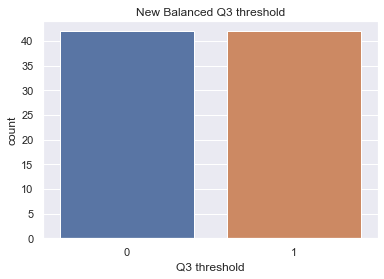

In [124]:
sns.set_theme(style ='darkgrid')
ax = sns.countplot(x ='Q3 threshold', data = os_data_y)
ax.set_title("New Balanced Q3 threshold")

In [ ]:
# The Box-Tidwell test can be used to explore whether the independent variables () are linearly related to the log odds (Assumption 5). 
#However, the Box-Tidwell test is only applicable to continuous variables.

fAmag_norm = sns.regplot(x = 'fAmag_norm',
                  y= 'Q3 threshold',
                  data=accel_8_curb_up_copy,
                  logistic= True).set_title("fAmag_norm Log Odds Linear Plot")

In [ ]:
# Name the new DataFrame and specify all the columns for BLR:
nec_cols = [ 'time_seconds_delta', 'fAmag_norm']

# Set the independent variable.
X = os_data_X[nec_cols]  

# Set the dependent variable.
y = os_data_y['Q3 threshold']  

# Set the logit() to accept y and x as parameters and return the logit object:
logit_model_1=sm.Logit(y, X)

# Indicate result = logit_model.fit() function.
result = logit_model_1.fit()  

# Print the results.
result.summary()

In [ ]:
# Import necessary packages:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# Split X and y data sets into ‘train’ and ‘test’ in a 30:70 ratio:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=0)

# Set LogisticRegression() to logreg.
logreg = LogisticRegression() 

# Fit the X_train and y_train data sets to logreg. 
logreg.fit(X_train, y_train) 

In [ ]:
# Determine BLR model’s accuracy:
y_pred = logreg.predict(X_test)

print('Accuracy of logistic regression classifier on test set: {:.2f}'\
      .format(logreg.score(X_test, y_test)))

In [ ]:
# Create the confusion matrix to test classification accuracy in BLR:
# Import the necessary package to create the confusion matrix. 
from sklearn.metrics import confusion_matrix  

# Indicate the confusion matrix needs to be created.
confusion_matrix = confusion_matrix(y_test, y_pred)  

# Plot the confusion_matrix.
sns.heatmap(confusion_matrix, annot=True, fmt='g')

In [ ]:
# Import the necessary package.
from sklearn.metrics import classification_report  

# Print a report on the model's accuracy.
print(classification_report(y_test, y_pred))  

In [ ]:
nec_cols = [ 'time_seconds_delta', 'fAmag_norm']

X = IOT_accel[nec_cols]

In [ ]:
# Predict the abnormal behaviour
y_pred = logreg.predict(X)

In [ ]:
IOT_accel['accel_8_curb_up_BLR']=y_pred

In [ ]:
IOT_accel.head()

In [ ]:
IOT_accel['accel_8_curb_up_BLR'].value_counts()

In [ ]:
plt.figure(figsize=(15,8))
sns.lineplot(data=IOT_accel, x='time', y='fAmag_norm', hue='accel_8_curb_up_BLR')
plt.savefig("Accel 8 Curb up.png")

## Merging IOT Accel & Gyro Data

In [ ]:
# Merge accel and gyro data
IOT_accel.merge(IOT_gyro, on='time')

There is only 63 points that match. It reduce the data size a lot.

In [ ]:
# Group the time for accelleration and gyro then merge them
# Check min and max for time in accel and gyro data to determine groups
print(IOT_accel.describe())
print(IOT_gyro.describe())

In [ ]:
# Acceleration data
# Insert new columns for  time in 0.001 seconds 
IOT_accel.insert(1,'seconds_group','')

In [ ]:
# Calculate 0.001 seconds column
IOT_accel['seconds_group'] = round(IOT_accel['time'] / 0.001 , 0)

In [ ]:
# Groupby the data in 0.001 seconds durations
IOT_accel_2 = IOT_accel.groupby(by='seconds_group', as_index=False).mean()

In [ ]:
# Check the data
IOT_accel_2.head()

In [ ]:
# Gyro data
# Insert new columns for  time in 0.001 seconds 
IOT_gyro.insert(1,'seconds_group','')

In [ ]:
# Calculate 0.001 seconds column
IOT_gyro['seconds_group'] = round(IOT_gyro['time'] / 0.001 , 0)

In [ ]:
# Groupby the dsata in 0.001 seconds durations
IOT_gyro_2 = IOT_gyro.groupby(by='seconds_group', as_index=False).mean()

In [ ]:
# Check the data
IOT_gyro_2.head()

In [ ]:
# Merge accel_2 and gyro_2 data using new group
IOT_accel_gyro_merge = IOT_accel_2.merge(IOT_gyro_2, on='seconds_group')

In [ ]:
# Check the data
IOT_accel_gyro_merge

In [ ]:
# Reorganize the df
# Drop unnecessary columns
IOT_accel_gyro_merge.drop(['time_x', 'time_seconds_delta_x','time_y', 'time_seconds_delta_y'], axis=1, inplace=True)

# Create second_group_delta column for duration
IOT_accel_gyro_merge['seconds_group_delta'] = IOT_accel_gyro_merge['seconds_group'].diff()
IOT_accel_gyro_merge['seconds_group_delta']=IOT_accel_gyro_merge['seconds_group_delta'].fillna(0)

In [ ]:
# Check the data
IOT_accel_gyro_merge.head()

In [ ]:
# Reorder columns for easy reference
IOT_accel_gyro_merge = IOT_accel_gyro_merge[['seconds_group', 'seconds_group_delta', 'Amag', 'fAmag_norm', 'Gmag', 'Gmag_norm', 'Accel_7_fast_stop_BLR', 'accel_8_curb_up_BLR', 'IOT_gyro_1_curb_up_BLR', 'IOT_gyro_2_curb_up_BLR', 'Throw_bike_Gyro_4_DTC', 'Throw_bike_Gyro_5_DTC']]
IOT_accel_gyro_merge.head()

## Safety Score Calculation

In [ ]:
# Adding column for safety score multiplier as sum of incident columsn
IOT_accel_gyro_merge['safety_score_multiplier'] = round(IOT_accel_gyro_merge[['Accel_7_fast_stop_BLR',
                                                                       'accel_8_curb_up_BLR',
                                                                       'IOT_gyro_1_curb_up_BLR',
                                                                       'IOT_gyro_2_curb_up_BLR',
                                                                       'Throw_bike_Gyro_4_DTC',
                                                                       'Throw_bike_Gyro_5_DTC']].sum(axis=1),0)

In [ ]:
# Check the values in new column. See how many times incidents occur
IOT_accel_gyro_merge['safety_score_multiplier'].value_counts()

In [ ]:
# Checking how long incidents occur
IOT_accel_gyro_merge_incident_dur = IOT_accel_gyro_merge.groupby('safety_score_multiplier').agg(#Time_Start=('seconds_group', np.min),
                                                        #Time_End=('seconds_group', np.max),
                                                        Duration=('seconds_group_delta',np.sum))
IOT_accel_gyro_merge_incident_dur
# Remember durations in below should be multiplied by 0.001. We divided seconds to 0.001 to group them.

In [ ]:
# Multiply by 0.001 to view actual durations
IOT_accel_gyro_merge_incident_dur['Duration']=IOT_accel_gyro_merge_incident_dur['Duration']*0.001

# Preview data
IOT_accel_gyro_merge_incident_dur

In [ ]:
#Saving the dataframe as png
import dataframe_image as dfi
dfi.export(IOT_accel_gyro_merge_incident_dur,"safety_score_multiplier Duration.png")

In [ ]:
# Visualise safety score multiplier on data

fig, axes = plt.subplots(2,1, figsize=(12,10), sharex=True, sharey=True)

sns.scatterplot(data=IOT_accel_gyro_merge, ax=axes[0], x = 'seconds_group', y = 'fAmag_norm', hue = 'safety_score_multiplier').set(title = 'Amag_norm - Safety Score Multiplier')
axes[0].set_xlabel('')

sns.scatterplot(data=IOT_accel_gyro_merge, ax=axes[1], x = 'seconds_group', y = 'Gmag_norm', hue = 'safety_score_multiplier').set(title = 'Gmag_norm - Safety Score Multiplier')
axes[1].set_xlabel('')

fig.savefig("safety_score_multiplier Amag & Gmag")